In [1]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("db/runners_2018_complete.csv",parse_dates=True)#.dropna().drop("meet_date",axis=1).drop("datetime",axis=1)
df.head()

,Unnamed: 0,runr_id,2018_beg_pace,2018_end_pace,school_id,team_size,gender,pace,num_races,rank,pct_rank,pr_time,race_diff,pr_flag,goal_set,log_entries_sept,log_entries_nov,log_entries_all,max_effort_log_entries_sept,max_effort_log_entries_nov,max_effort_log_entries_all,sum_effort_log_entries_nov,2018_improvement
0,0,93337,6.099538,6.554276,1113,158,0,6.31,10,19.3,0.11,80020,3959.00,8,0,40.0,205.0,1314.0,8.0,27.0,242.0,513.0,-0.45
1,1,93338,6.040506,6.482491,1113,158,0,6.20,8,13.1,0.07,76880,506.88,5,0,34.0,175.0,1004.0,1.0,3.0,105.0,526.0,-0.44
2,2,93339,7.748333,7.782427,1113,158,0,7.66,6,52.7,0.51,83760,-1915.50,0,0,11.0,44.0,344.0,0.0,0.0,11.0,131.0,-0.03
3,3,93340,5.653889,5.945140,1113,158,1,5.79,9,67.4,0.39,68580,-872.67,3,0,35.0,166.0,993.0,0.0,0.0,5.0,498.0,-0.29
4,4,93342,7.973333,7.107244,941,362,1,7.61,6,192.3,0.77,81460,-4471.50,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.87


In [3]:
df = df.drop(df.columns[0], axis=1)
df.head()

,runr_id,2018_beg_pace,2018_end_pace,school_id,team_size,gender,pace,num_races,rank,pct_rank,pr_time,race_diff,pr_flag,goal_set,log_entries_sept,log_entries_nov,log_entries_all,max_effort_log_entries_sept,max_effort_log_entries_nov,max_effort_log_entries_all,sum_effort_log_entries_nov,2018_improvement
0,93337,6.099538,6.554276,1113,158,0,6.31,10,19.3,0.11,80020,3959.00,8,0,40.0,205.0,1314.0,8.0,27.0,242.0,513.0,-0.45
1,93338,6.040506,6.482491,1113,158,0,6.20,8,13.1,0.07,76880,506.88,5,0,34.0,175.0,1004.0,1.0,3.0,105.0,526.0,-0.44
2,93339,7.748333,7.782427,1113,158,0,7.66,6,52.7,0.51,83760,-1915.50,0,0,11.0,44.0,344.0,0.0,0.0,11.0,131.0,-0.03
3,93340,5.653889,5.945140,1113,158,1,5.79,9,67.4,0.39,68580,-872.67,3,0,35.0,166.0,993.0,0.0,0.0,5.0,498.0,-0.29
4,93342,7.973333,7.107244,941,362,1,7.61,6,192.3,0.77,81460,-4471.50,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.87


In [4]:
df = df.drop(["2018_beg_pace","2018_end_pace","school_id","runr_id","pct_rank",'pr_time',"pr_flag"],axis=1)
df

,team_size,gender,pace,num_races,rank,race_diff,goal_set,log_entries_sept,log_entries_nov,log_entries_all,max_effort_log_entries_sept,max_effort_log_entries_nov,max_effort_log_entries_all,sum_effort_log_entries_nov,2018_improvement
0,158,0,6.31,10,19.3,3959.00,0,40.0,205.0,1314.0,8.0,27.0,242.0,513.0,-0.45
1,158,0,6.20,8,13.1,506.88,0,34.0,175.0,1004.0,1.0,3.0,105.0,526.0,-0.44
2,158,0,7.66,6,52.7,-1915.50,0,11.0,44.0,344.0,0.0,0.0,11.0,131.0,-0.03
3,158,1,5.79,9,67.4,-872.67,0,35.0,166.0,993.0,0.0,0.0,5.0,498.0,-0.29
4,362,1,7.61,6,192.3,-4471.50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.87
5,362,1,7.72,2,386.5,-4660.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
6,169,1,6.72,7,162.7,3837.14,2,21.0,42.0,256.0,0.0,0.0,7.0,126.0,0.43
7,158,0,8.71,4,84.0,-9128.25,0,12.0,67.0,746.0,0.0,0.0,7.0,201.0,-0.07
8,158,1,5.63,10,45.4,1874.90,0,18.0,34.0,415.0,3.0,6.0,66.0,84.0,-0.34
9,158,1,5.68,10,48.7,3424.20,0,38.0,203.0,1071.0,2.0,7.0,90.0,501.0,-0.21


In [5]:
df[df["log_entries_all"].notnull()]

,team_size,gender,pace,num_races,rank,race_diff,goal_set,log_entries_sept,log_entries_nov,log_entries_all,max_effort_log_entries_sept,max_effort_log_entries_nov,max_effort_log_entries_all,sum_effort_log_entries_nov,2018_improvement
0,158,0,6.31,10,19.3,3959.00,0,40.0,205.0,1314.0,8.0,27.0,242.0,513.0,-0.45
1,158,0,6.20,8,13.1,506.88,0,34.0,175.0,1004.0,1.0,3.0,105.0,526.0,-0.44
2,158,0,7.66,6,52.7,-1915.50,0,11.0,44.0,344.0,0.0,0.0,11.0,131.0,-0.03
3,158,1,5.79,9,67.4,-872.67,0,35.0,166.0,993.0,0.0,0.0,5.0,498.0,-0.29
4,362,1,7.61,6,192.3,-4471.50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.87
5,362,1,7.72,2,386.5,-4660.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
6,169,1,6.72,7,162.7,3837.14,2,21.0,42.0,256.0,0.0,0.0,7.0,126.0,0.43
7,158,0,8.71,4,84.0,-9128.25,0,12.0,67.0,746.0,0.0,0.0,7.0,201.0,-0.07
8,158,1,5.63,10,45.4,1874.90,0,18.0,34.0,415.0,3.0,6.0,66.0,84.0,-0.34
9,158,1,5.68,10,48.7,3424.20,0,38.0,203.0,1071.0,2.0,7.0,90.0,501.0,-0.21


In [6]:
X = df.drop("rank",axis=1)

In [7]:
X

,team_size,gender,pace,num_races,race_diff,goal_set,log_entries_sept,log_entries_nov,log_entries_all,max_effort_log_entries_sept,max_effort_log_entries_nov,max_effort_log_entries_all,sum_effort_log_entries_nov,2018_improvement
0,158,0,6.31,10,3959.00,0,40.0,205.0,1314.0,8.0,27.0,242.0,513.0,-0.45
1,158,0,6.20,8,506.88,0,34.0,175.0,1004.0,1.0,3.0,105.0,526.0,-0.44
2,158,0,7.66,6,-1915.50,0,11.0,44.0,344.0,0.0,0.0,11.0,131.0,-0.03
3,158,1,5.79,9,-872.67,0,35.0,166.0,993.0,0.0,0.0,5.0,498.0,-0.29
4,362,1,7.61,6,-4471.50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.87
5,362,1,7.72,2,-4660.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
6,169,1,6.72,7,3837.14,2,21.0,42.0,256.0,0.0,0.0,7.0,126.0,0.43
7,158,0,8.71,4,-9128.25,0,12.0,67.0,746.0,0.0,0.0,7.0,201.0,-0.07
8,158,1,5.63,10,1874.90,0,18.0,34.0,415.0,3.0,6.0,66.0,84.0,-0.34
9,158,1,5.68,10,3424.20,0,38.0,203.0,1071.0,2.0,7.0,90.0,501.0,-0.21


In [8]:
y=1/df["rank"]

In [9]:
df.head().reset_index().shape

(5, 16)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\dawnb\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dawnb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dawnb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [12]:
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=.25,
    max_features=8,
    max_depth=6,
    random_state=0)
# Fit the model
model.fit(X_train_scaled,y_train.ravel())
# Score the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled,
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled,
        y_test)))

Accuracy score (training): 0.996
Accuracy score (validation): 0.436


In [13]:
predictions = model.predict(X_test_scaled)
y_test = y_test.ravel()
actual = pd.Series(y_test)

In [14]:
pd.DataFrame({'Model0':predictions,'Actual': actual}).head()

,Model0,Actual
0,0.035583,0.026810
1,0.016208,0.014225
2,0.053718,0.063291
3,0.014212,0.028571
4,0.004781,0.003195


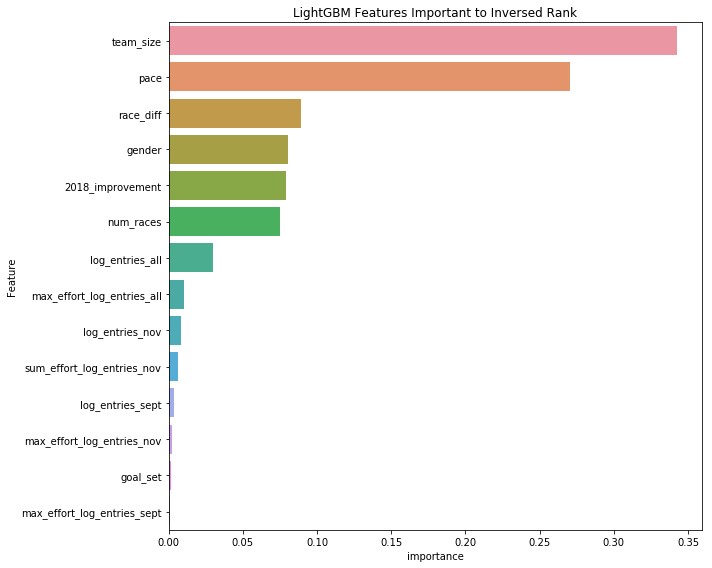

In [15]:
fold_importance_df=pd.DataFrame()
fold_importance_df['Feature']=df.tail(5).drop("rank",axis=1).columns
feature_importance_df=pd.DataFrame()
fold_importance_df["importance"]=model.feature_importances_[:len(df.tail(5).columns)]
feature_importance_df=pd.concat([feature_importance_df, fold_importance_df], axis=0)
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:200].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
plt.figure(figsize=(10,8))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features Important to Inversed Rank')
plt.tight_layout()
plt.savefig('importances_runners_2018_inverse_rank.png')

In [16]:
fold_importance_df

,Feature,importance
0,team_size,0.342389
1,gender,0.080613
2,pace,0.270473
3,num_races,0.074681
4,race_diff,0.089436
5,goal_set,0.001611
6,log_entries_sept,0.003905
7,log_entries_nov,0.008458
8,log_entries_all,0.029565
9,max_effort_log_entries_sept,0.000840
